# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko


 * [Numpy,Scipy,Scikit-image를 통한 기본 영상 처리5](#Numpy,Scipy,Scikit-image를-통한-기본-영상-처리5) 
     * [ImageDraw 이용해서 text 삽입](#ImageDraw-이용해서-text-삽입)
         * [text](#text )
            * [한글 ](#한글 )   
         * [Numpy 이용해서 그리기](#Numpy-이용해서-그리기)
            * [좌표축 만들기  ](#좌표축-만들기 )
                * [meshgrid  ](#meshgrid )
                * [ix_  ](#ix_ )
                * [atleast_2d  ](#atleast_2d )
                * [mgrid  ](#mgrid )
                * [ogrid  ](#ogrid )
             * [mask 이용해서 그리기](#mask-이용해서-그리기)
                * [선 ](#선 )
                * [원 ](#원 )
             * [회전 행렬 이용해서 원 그리기](#회전행렬-이용해서-그리기)
                * [회전행렬 ](#회전행렬 )
      * [einsum](#einsum)


---
## Numpy,Scipy,Scikit-image를 통한 기본 영상 처리5

Numpy, Scikit-image, PIL, OpenCV 영상처리 기본
- segmentation 에 많이 쓰임

- openCV
    - 이미지를 numpy format으로 불러올 수 있음 
- PIL 
    - Numpy  인터페이스가 있어 변환 가능
    - 메타정보 예. EXIF
    - tf, pytorch 가 이미지 처리를 내부적으로 PIL 확장용이
        - 상속시 PIL 기반으로 추가 
        
   - openCV,matplotlib :기본적으로 한글 출력 안 되어서 PIL 이용해서 한글 폰트 불러와야함
각장의 특징을 이용해서 대체해야함

In [1]:
from PIL import Image

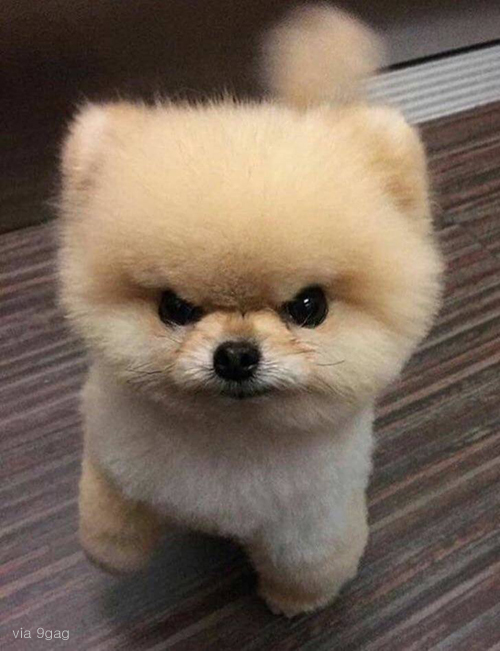

In [2]:
img=Image.open('dog.jpg') 
img

In [3]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x651 at 0x7FD481567F50>


PIL에서 가져온 이미지가 str, repr과 비슷한 형태로 객체호출과 print호출시 상이

### \_\_str__ vs \_\_repr__ 
- str
    - print시 호출 
- repr
    - 객체 호출

In [4]:
class A(int): # int 상속
    def __repr__(self):
        return '__repr__'
    def __str__(self):
        return '__str__'

In [5]:
a=A()
a+1

1

In [6]:
a

__repr__

In [7]:
print(a)

__str__


PIL
- Numpy기반이 아니기 때문에 조작시 matrix로 이미지 연산 안하고 기존의 python기법으로 함
- 객체지향 : 결과는 array format이 아닌 객체로 구성( repr,str) 
    - 과학,공학 관련된 부분은 Scikit-image, Scipy, Numpy 로 이용 
- pytorch, tf내부적으로 이용
- 이미지 meta정보 
- array interface 지원하기 때문에 Numpy format으로 변환 쉬움

용도
1. object detection 최종결과물 자르기
2. object detection 의 bounding box위에 인식한 객체의 이름

### ImageDraw 이용해서 이미지에 text 삽입
- 폰트도 이미지 그리는 것과 동일한 방식

In [8]:
from PIL import ImageDraw, ImageDraw2, ImageFont

In [9]:
 dir(ImageDraw2) #기능

['Brush',
 'Draw',
 'Font',
 'Image',
 'ImageColor',
 'ImageDraw',
 'ImageFont',
 'ImagePath',
 'Pen',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

In [10]:
set(dir(ImageDraw2))^set(dir(ImageDraw)) #대칭 차집합

{'Brush',
 'Font',
 'ImageFont',
 'ImagePath',
 'Outline',
 'Pen',
 '_color_diff',
 'floodfill',
 'getdraw',
 'math',
 'numbers'}

In [11]:
set(dir(ImageDraw))-set(dir(ImageDraw2))

{'Outline', '_color_diff', 'floodfill', 'getdraw', 'math', 'numbers'}

In [12]:
draw= ImageDraw.Draw(img)

In [15]:
draw.rectangle(((50,50),(150,100)),fill='black') #output 없는 mutable technique
draw.text(((400,400)),'dog',fill=(255,255,255)) 

### text
- mutable 방식으로 이미지에 텍스트 삽입
- `text((x0,y0),'text',fill=색상)`
    - 좌표 하나만 필요

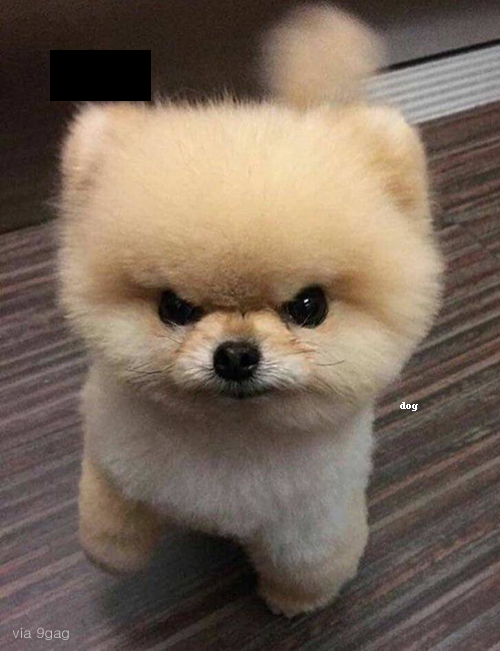

In [16]:
img

### 한글 폰트
- PIL로 한글 넣을수 있음 
composition 방식으로 넣어야함
#### ImageFont
- load_path(filename)
    - 특정 위치에 폰트 읽어옴
- load_default
    - 기본
- truetype
    - os별 특정 디렉토리에 있는 폰트 불러옴
    - 벡터 방식으로 확대/축소해도 깨지지 않음

In [ ]:
draw.text(((400,400)),'강아지') #UnicodeEncodeError: 'latin-1' codec ->폰트문제

In [16]:
ImageFont.load_path()     #특정 폰트를 읽어옴
font=ImageFont.load_default()   #기본 

In [ ]:
draw.text(((400,400)),'강아지',font=font ) #UnicodeEncodeError: 'latin-1' codec ->기본값이니 당연히 에러

In [ ]:
#window
font=ImageFont.truetype('Malgun.ttf')   #library 폴더 내의 파일의 폰트 읽어옴 
draw.text(((80,80)),'강아지',fill=(255,255,255),size=16,font=font) 

In [17]:
#Mac 
font=ImageFont.truetype('AppleGothic.ttf')   #library 폴더 내의   폰트 읽어옴 (OS마다 상이)
draw.text(((80,80)),'강아지',fill=(255,255,255),size=30,font=font) 

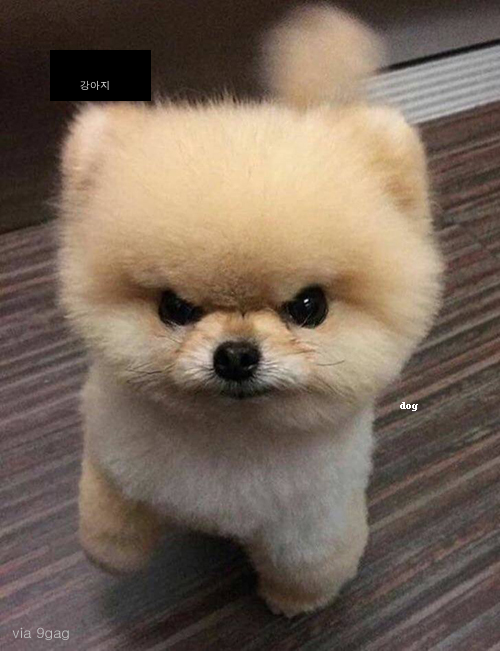

In [18]:
img

글자 크기만큼 박스 사이즈를 자동으로 맞추기 위해서 글자의 크기를 알아야함

- getsize
    - 폰트의 가로,세로 크기 (가로,세로)
- size
    - 폰트 사이즈 (세로크기)

In [19]:
dir(font) # 크기 관련 size, getsize

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_multiline_split',
 'encoding',
 'font',
 'font_variant',
 'get_variation_axes',
 'get_variation_names',
 'getmask',
 'getmask2',
 'getmetrics',
 'getname',
 'getoffset',
 'getsize',
 'getsize_multiline',
 'index',
 'layout_engine',
 'path',
 'set_variation_by_axes',
 'set_variation_by_name',
 'size']

In [20]:
font.getname()

('AppleGothic', 'Regular')

In [21]:
font.size

10

In [22]:
font.getsize('강아지') #이 사이즈가 핵심

(30, 10)

In [23]:
font.getsize_multiline('긴글도 가능합니다. 두번째 줄')

(132, 9)

In [ ]:
x,y 를 기점으로 글자 크기만큼 가로,세로가 각 오른쪽으로 ,아래쪽으로 이동

In [27]:
#Mac 
font=ImageFont.truetype('AppleGothic.ttf',size=20)   #library 폴더 내의   폰트 읽어옴 (OS마다 상이)
text='강아지'
text_width, text_height= font.getsize(text)        #unpacking
text_width, text_height                             #강아지는 가로 60 세로 20

(60, 20)

In [30]:
x,y= 50,50 #origin (50,50)
draw.rectangle(((x,y),(x+text_width,y+text_height)),fill='pink') #output 없는 mutable technique
draw.text((x,y),text,font=font,fill=(255,255,255)) 

In [ ]:
x,y= 50,50
draw.rectangle(((x,y-text_height),(x+text_width,y)),fill='black') #output 없는 mutable technique
draw.text((x,y-text_height),text,fill=(255,255,255),font=font) 

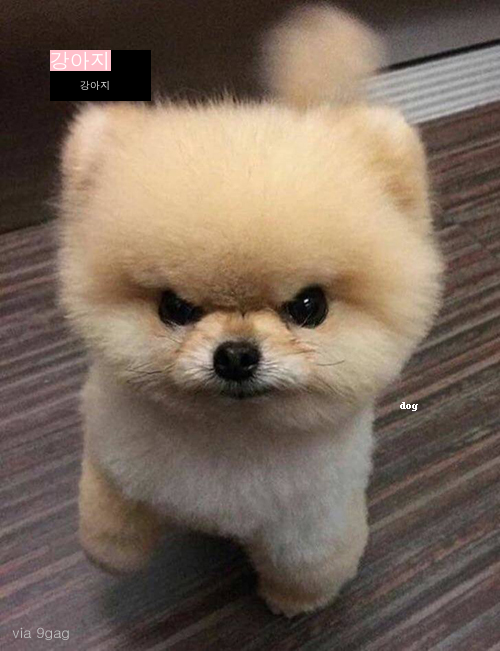

In [31]:
img

object detection 에서 객체에 class
label에 색상 넣기
폰트의 가로,세로 크기를 받아서 해당 크기만큼 상자를 만듦

In [32]:
img.size

(500, 651)

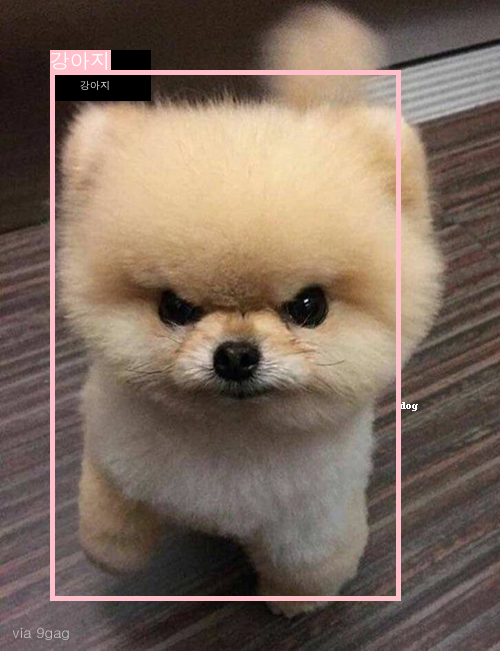

In [33]:
draw.rectangle(((x,y+text_height),(400,600)),outline='pink',width=5) #output 없는 mutable technique
img

### Numpy 이용해서 그리기
### 좌표축 만들기
- meshgrid
    - matlab에서 차용
    - output 행렬
- ix_
    - 차원이 증가됨
    - output 
    - 이전에는 indexing으로 소개함 참고: https://numpy.org/doc/stable/user/quickstart.html#the-ix-function
> - indexer : r_[],c_[]
        - 인덱싱처럼 씀
>- slicer: s_[]
        - 슬라이서처럼 씀

In [17]:
import numpy as np
x=np.array([0,1,2,3])  #1차원
y=np.array([0,10,20,30])

In [47]:
xx,yy=np.meshgrid(x,y)
xx,yy

(array([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]]),
 array([[ 0,  0,  0,  0],
        [10, 10, 10, 10],
        [20, 20, 20, 20],
        [30, 30, 30, 30]]))

In [46]:
xx+yy

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

In [37]:
np.ix_(x,y) #len technique

(array([[0],
        [1],
        [2],
        [3]]),
 array([[ 0, 10, 20, 30]]))

In [38]:
len(np.ix_(x,y))

2

In [39]:
a,b=np.ix_(x,y) 

In [40]:
a  #axis=0으로 확장

array([[0],
       [1],
       [2],
       [3]])

In [41]:
x[:,np.newaxis]

array([[0],
       [1],
       [2],
       [3]])

In [42]:
y[np.newaxis]

array([[ 0, 10, 20, 30]])

In [43]:
b #axis=1으로 확장

array([[ 0, 10, 20, 30]])

In [44]:
a+b #내부적으로 broadcasting됨 

array([[ 0, 10, 20, 30],
       [ 1, 11, 21, 31],
       [ 2, 12, 22, 32],
       [ 3, 13, 23, 33]])

쪼개어서 broadcasting

In [95]:
np.broadcast_arrays(a,b) #

[array([[0, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]]),
 array([[ 0, 10, 20, 30],
        [ 0, 10, 20, 30],
        [ 0, 10, 20, 30],
        [ 0, 10, 20, 30]])]

In [97]:
xx,yy= np.broadcast_arrays(a,b) 
xx+yy   #결과가 동일함

array([[ 0, 10, 20, 30],
       [ 1, 11, 21, 31],
       [ 2, 12, 22, 32],
       [ 3, 13, 23, 33]])

### atleast_2d
- 1차원 데이터를 2차원으로 변경시 차원 맞춰줄때 편함

In [103]:
np.atleast_2d(x,y)  #1차원에서 2차원 형태로 변경

[array([[0, 1, 2, 3]]), array([[ 0, 10, 20, 30]])]

In [104]:
c=np.arange(24).reshape(2,3,4)
np.atleast_2d(c)   #3차원 그대로

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [106]:
np.atleast_2d(c).ndim

3

### mgrid
- meshgrid 간략 버전

### ogrid
- ix_ 간략 버전
- broadcasting 따로 해줘야함

In [109]:
np.mgrid[:10,:10]

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],

       [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [110]:
np.mgrid[:10:2,:10:2]  #2개 마다 (step size)

array([[[0, 0, 0, 0, 0],
        [2, 2, 2, 2, 2],
        [4, 4, 4, 4, 4],
        [6, 6, 6, 6, 6],
        [8, 8, 8, 8, 8]],

       [[0, 2, 4, 6, 8],
        [0, 2, 4, 6, 8],
        [0, 2, 4, 6, 8],
        [0, 2, 4, 6, 8],
        [0, 2, 4, 6, 8]]])

### j technique
-  j는 python에서 complex 복소수 
- numpy에서는 갯수

### np.newaxis
- return None

> Numpy에서는 다양헌 기능을 제공해주기 위해서  operator overloading 지원
- np.newaxis=None,   complex j, @ 와 같은 기능을 써서 확장시킴

In [113]:
np.mgrid[:10:3j,:10:5j] # 갯수 맞춰줌 linspace,logspace와 비슷한 방법

array([[[ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 5. ,  5. ,  5. ,  5. ,  5. ],
        [10. , 10. , 10. , 10. , 10. ]],

       [[ 0. ,  2.5,  5. ,  7.5, 10. ],
        [ 0. ,  2.5,  5. ,  7.5, 10. ],
        [ 0. ,  2.5,  5. ,  7.5, 10. ]]])

In [116]:
np.linspace(0,10,3), np.linspace(0,10,5)

(array([ 0.,  5., 10.]), array([ 0. ,  2.5,  5. ,  7.5, 10. ]))

In [119]:
xx,yy=np.ogrid[:10:3j,:10:5j]
xx,yy

(array([[ 0.],
        [ 5.],
        [10.]]),
 array([[ 0. ,  2.5,  5. ,  7.5, 10. ]]))

In [107]:
a+b.T

array([[ 0],
       [11],
       [22],
       [33]])

### mask 이용해서 그리기
#### 선

In [97]:
import matplotlib.pyplot as plt

In [122]:
xx,yy=np.ogrid[:100,:100]     #mask 할때 broadcastinge됨
mask=yy-2*xx+3==0            # yy=2*xx+3인경우 True, 그 외 False
condinator=np.ones((100,100))
condinator[mask]=255         # mask값에 해당한 경우만 하얀색

(-0.5, 99.5, 99.5, -0.5)

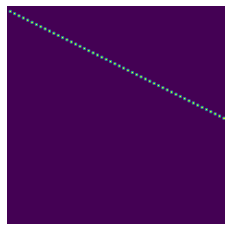

In [151]:
plt.imshow(condinator)
plt.axis('off')

#### 원 

(-0.5, 99.5, 99.5, -0.5)

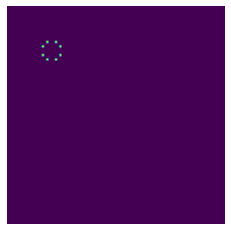

In [153]:
xx,yy=np.ogrid[:100,:100]     #mask 할때 broadcastinge됨
mask=(yy-20)**2+(xx-20)**2 -20==0            # 
condinator=np.ones((100,100))
condinator[mask]=255         # mask값에 해당한 경우만 하얀색
plt.imshow(condinator)
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

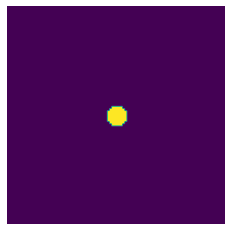

In [156]:
xx,yy=np.ogrid[:100,:100]     #mask 할때 broadcastinge됨
mask=(yy-50)**2+(xx-50)**2 -20<=0            # 
condinator=np.ones((100,100))
condinator[mask]=255         # mask값에 해당한 경우만 하얀색
plt.imshow(condinator)
plt.axis('off')

#### 회전행렬 이용해서 그리기

#### 회전행렬
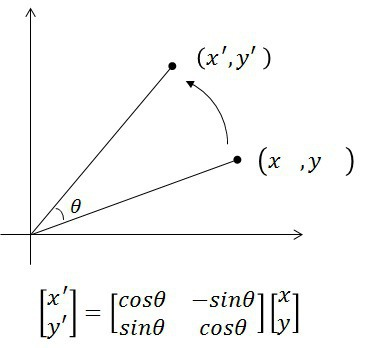
- 행렬 회전할때 곱하면 회전되도록 바뀌어짐
- 이미지 회전시킬때 사용 
    - 원도 그릴 수 있음
- 각도에서의 pi

[ $ \cos\theta , -\sin\theta $ ] <br>
[ $ \sin\theta , \cos\theta $  ]

In [180]:
tt= np.array([[0,1],[1,0]])

In [181]:
th=np.pi/4 
rotate=np.array([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
tt@rotate

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [182]:
th=np.pi/2
rotate=np.array([[np.cos(th),np.sin(th)],[-np.sin(th),np.cos(th)]])
tt@rotate

array([[-1.000000e+00,  6.123234e-17],
       [ 6.123234e-17,  1.000000e+00]])

In [183]:
rotate@tt

array([[ 1.000000e+00,  6.123234e-17],
       [ 6.123234e-17, -1.000000e+00]])

@ 
- decorator 아님( function/class에 사용해야함)
- 행렬곱 연산자로 사용함

In [164]:
s=np.array([1,2])
t=np.array([[1],[2]])

In [163]:
s*t  #element-wise

array([[1, 2],
       [2, 4]])

In [165]:
s@t #행렬곱

array([5])

In [166]:
np.dot(s,t)

array([5])

In [168]:
np.matmul(s,t)

array([5])

In [175]:
np.multiply(s,t)

array([[1, 2],
       [2, 4]])

In [169]:
ss=np.mat([1,2])
tt=np.mat([[1],[2]])

In [173]:
ss*tt # 이건 주의  np.mat에서는 내적임

matrix([[5]])

In [174]:
ss@tt

matrix([[5]])

In [170]:
np.dot(ss,tt)

matrix([[5]])

In [171]:
np.multiply(ss,tt)

matrix([[1, 2],
        [2, 4]])

In [99]:
th=np.linspace(0,2*np.pi,1024) #0~2까지 1024개로 나눔
th.shape

(1024,)

In [100]:
rotate=np.array([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]]) #원점 중심으로 회전함
point=np.array([1,0]) #1024번을 곱함.

In [101]:
point.repeat(1024) #모양바꿈 : 각 각 1024개의 1과 0 

array([1, 1, 1, ..., 0, 0, 0])

In [102]:
x=np.arange(6).reshape(2,3)
x.repeat(3) #각 원소를 3번씩 나열

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5])

In [199]:
np.tile(x,(2,3))

array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5, 3, 4, 5]])

In [103]:
x,y=np.einsum('...ij,...i',rotate,point) #복잡한 연산을 단순화한 수식으로 표현 
x,y

(array([1.        , 0.99998114, 0.99992455, ..., 0.99992455, 0.99998114,
        1.        ]),
 array([ 0.00000000e+00,  6.14188251e-03,  1.22835333e-02, ...,
        -1.22835333e-02, -6.14188251e-03, -2.44929360e-16]))

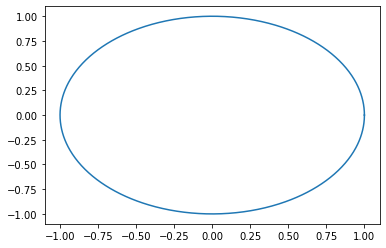

In [104]:
plt.plot(x,y) #

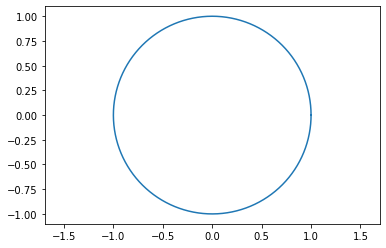

In [109]:
plt.axes().set_aspect('equal','datalim');
plt.plot(x,y);

### linspace
그래프 그릴때 점으로 찍는데 점을 선처럼 촘촘히 찍어서 그래프를 연결할때 곡선표현이 더 자연스러움

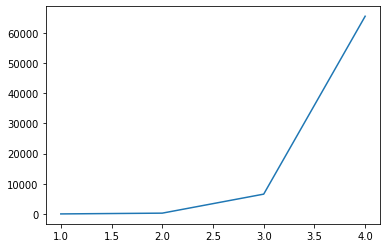

In [191]:
x=np.array([1,2,3,4]) #점이 4개이므로 직선으로 연결하여 부자연스러움
y=x**8
plt.plot(x,y)

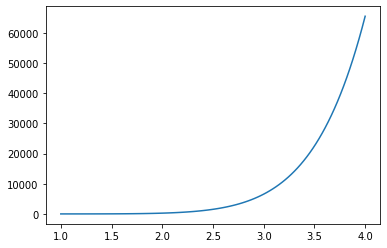

In [192]:
x=np.linspace(1,4,100) #100개를 연결하면 상대적으로 부드러워짐
y=x**8
plt.plot(x,y)

### einsum
- Einstein Summmation( Einstein이 표기함)
- 규칙에 따라서 간결하게 벡터와 ∑연산을 함께 표현 가능 

장점
- 다양한 연산에 대한 통일된 표기
- 딥러닝 프레임워크에서는 기본적으로 vectorization이용해서 구현하기 때문에 핵심
- 텐서,numpy로 구현할건데  einsum으로 벡터행렬 곱의 합을 한줄로 표현
- 수식과 프로그래밍의  간극을 줄임
    - 논문 구현에서 많이 사용됨


- np.einsum(' , , ' 인자0,인자1,인자2)
    - 인자 갯수만큼 string으로 들어감
    - 차원별로 표기 방법이 다름
Numpy.pdf 뒷부분 참고
### Einsum is All You Need
> Attention is All You Need 
    - 자연어처리에서 유명한 논문

In [65]:
a= np.array([0,1,2,3])
aa=np.arange(6).reshape(2,3)
bb=np.arange(1,5).reshape(2,2)

In [206]:
np.einsum('i',a) # i=a

array([0, 1, 2, 3])

#### 규칙
- 인자갯수와 input index그룹 갯수와 동일해야함
- 인덱스는 ASCII 대문자,소문자로 표기해야함 

In [207]:
np.einsum('b',a) # 문자열은 아무거나 넣어도 상관 없음

array([0, 1, 2, 3])

inner product
- 내적
- $c=∑_iA_iB_i=A_iB_i$

In [208]:
np.einsum('b,b',a,a) #inner dot(내적)

14

In [209]:
np.inner(a,a)

14

In [210]:
a@a         #0*0+1*1+2*2+3*3=14

14

### -> 
- 합을 의미함
a -> 1차원의 모든 원소르합을 0차원으로 표기

In [211]:
np.einsum('i->',a)  #합 0+1+2+3=6

6

In [212]:
np.einsum('i,i->',a,a) #각 벡터간의 내적 (곱해서 합함)

14

In [ ]:
np.einsum('i',aa) # 2차원은 차원만큼 표기 늘려야함

In [215]:
np.einsum('ij',aa) #행 i 열j, 동일한 글자 쓰면 안됨

array([[0, 1, 2],
       [3, 4, 5]])

### Transpose
- 행렬 전치 
- $R=A^T$
- $R_{ij}=A_{ji}$

In [228]:
np.einsum('ji',aa) #전치행렬

array([[0, 3],
       [1, 4],
       [2, 5]])

In [229]:
np.einsum('ij->ji',aa) #전치행렬

array([[0, 3],
       [1, 4],
       [2, 5]])

In [66]:
aa.T

array([[0, 3],
       [1, 4],
       [2, 5]])

### Diagonal
- 행,열이 동일한 경우의 대각원소를 가라킴
- $r_i=A_{ii}$

In [57]:
np.einsum('ii->i',bb) # 대각원소)

array([1, 4])

In [62]:
np.diag(bb)

array([1, 4])

### Trace 
- 대각원소의 합
- $r=∑_i A_{ii}$


In [60]:
np.einsum('ii->',bb) # 대각원소의 합(trace)

5

In [63]:
np.trace(bb)

5

### Sum
- 모든 원소의 합
- $ r=∑_i∑_jA_{ij}$


In [95]:
np.einsum('ij->',bb) #열간의 합

10

### Row Sum

In [56]:
np.einsum('ij->i',bb) #열간의 합

array([3, 7])

### Column Sum

In [54]:
np.einsum('ij->j',bb) #행간의 합

array([4, 6])

In [241]:
aa*aa

array([[ 0,  1,  4],
       [ 9, 16, 25]])

In [217]:
aa@aa.T

array([[ 5, 14],
       [14, 50]])

In [219]:
np.sum(aa*aa)

55

In [222]:
np.matmul(aa,aa.T)

array([[ 5, 14],
       [14, 50]])

In [225]:
np.sum(np.matmul(aa,aa.T),axis=0)

array([19, 64])

In [68]:
aa=np.arange(4).reshape(2,2)
bb=np.arange(1,5).reshape(2,2)

In [74]:
aa@bb

array([[ 3,  4],
       [11, 16]])

In [84]:
np.einsum('aa->a',aa) #대각원소 (원소가 행과 열이 동일한 경우)

array([0, 3])

In [85]:
np.einsum('aa->',aa) #대각원소의 합

3

In [69]:
np.einsum('ab,ba',aa,bb)

19

In [70]:
np.einsum('ab,bc->ac',aa,bb)

array([[ 3,  4],
       [11, 16]])

In [50]:
aa@bb #행렬곱과 일치

array([[ 3,  4],
       [11, 16]])

행렬곱

In [51]:
np.einsum('ab,bc->ac',aa,bb)

array([[ 3,  4],
       [11, 16]])

행렬곱의 합

In [78]:
np.einsum('ab,bc->a',aa,bb ) #행렬곱 결과의 각 열의 합

array([ 7, 27])

In [79]:
np.einsum('ab,bc->c',aa,bb) #행렬곱 결과의 각 행의 합

array([14, 20])

In [115]:
np.array([2,4])*np.array([3,7])

array([ 6, 28])

In [77]:
np.einsum('ab,bc->b',aa,bb) #행,열기준으로 각 합한 후 element-wise로 곱함 

array([ 6, 28])

In [80]:
np.einsum('ab,bc->',aa,bb) # 행렬곱의 전체 합

34

In [81]:
np.sum( aa@bb) #행렬곱의 합

34

In [86]:
(aa[:, np.newaxis] * bb).sum(axis=1)

array([[ 0,  6],
       [ 8, 18]])

In [94]:
np.einsum('ij,jk->j', aa, bb)

array([ 6, 28])

### batch multipication
4차원 곱이 3차원으로 되는경우
bijc,bijd ->bcd